In [58]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

/home/fxlyonnet/miniconda3/envs/notebook/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)


(<Figure size 13536x288 with 1 Axes>, <AxesSubplot:>)

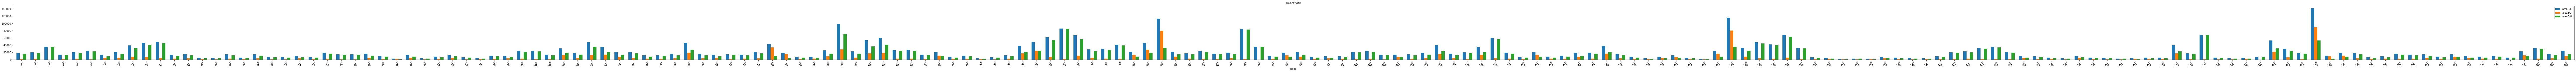

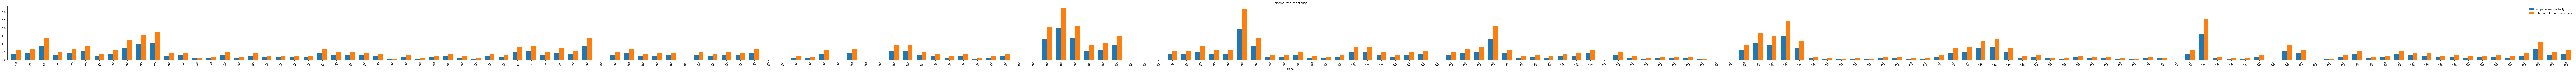

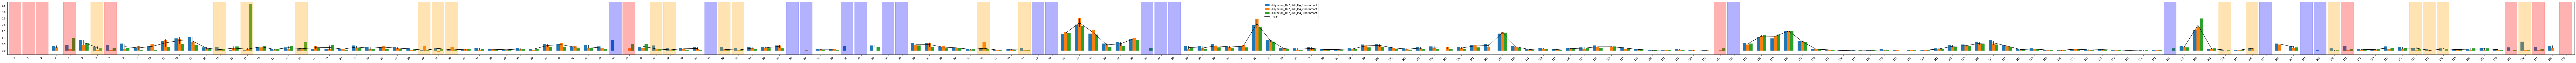

In [68]:
def plot_reactivity(df: pd.DataFrame, title = 'Reactivity'):
    df = df.sort_values(by=['seqNum'],ascending=True)
    df['xlabel'] = df['seqRNA'].astype(str) + "\n" + df['seqNum'].astype(str)

    return df.plot(x="xlabel", y=["areaRX", "areaBG", "areaDiff"],  width=0.7, rot=0, kind="bar", figsize=(len(df),4), title=title)

def plot_norm_reactivity(df: pd.DataFrame, title= 'Normalized reactivity'):
    df = df.sort_values(by=['seqNum'],ascending=True)
    df['xlabel'] = df['seqRNA'].astype(str) + "\n" + df['seqNum'].astype(str)
    df.loc[df['simple_norm_reactivity'] == -10, 'simple_norm_reactivity'] = 0
    df.loc[df['interquartile_norm_reactivity']  == -10,'interquartile_norm_reactivity'] = 0
    
    return df.plot(x="xlabel", y=["simple_norm_reactivity", "interquartile_norm_reactivity"],  width=0.7, rot=0, kind="bar", figsize=(len(df),4), title=title)

def plot_aggregation_infos(aggregated: pd.DataFrame, ax):
   
    first_idx = aggregated.first_valid_index()
    last_idx = aggregated.last_valid_index()
    unit = (56 / 4.) / (last_idx - first_idx) 
    
    for index, row in aggregated.loc[first_idx:last_idx].iterrows():
        if row["desc"] == "reduced":
            ax.axvspan((index - first_idx) - 0.5, (index - first_idx + 0.4), alpha=0.3, color='orange')
        if row["desc"] == "one-value-available":
            ax.axvspan((index - first_idx) - 0.5, (index - first_idx + 0.4), alpha=0.3, color='yellow')
        if row["desc"] == "no-enough-values":
            ax.axvspan((index - first_idx) - 0.5, (index - first_idx + 0.4), alpha=0.3, color='blue')
        if row["desc"] == "non-consistant":
            ax.axvspan((index - first_idx) - 0.5, (index - first_idx + 0.4), alpha=0.3, color='red')


def plot_aggregate(aggregated: pd.DataFrame, plot_each = False):
    
    replicates = aggregated.loc[:, aggregated.columns.drop(["used_values", "mean", "stdev", "desc", "abs_position", "sem"])].replace(-10, np.NaN)
    meanstdev = aggregated.loc[:,["mean", "stdev"]].replace(-10, np.NaN)
    
    ngraphs = 1 if not plot_each else (len(replicates.columns) + 1)
    
    fig, axs = plt.subplots(ngraphs, 1, figsize=(len(aggregated), ngraphs * 4))
    
    aggax = axs if ngraphs == 1 else axs[0]
    
    replicates.plot(ax=aggax, kind='bar',  width=0.7, stacked=False, )
    meanstdev.plot(ax=aggax, yerr='stdev',colormap=cm.cubehelix, )
    
    plot_aggregation_infos(aggregated, aggax)
    
 
    
    if plot_each:
        for i in range(len(replicates.columns)):
            replicates[replicates.columns[i]].plot(ax=axs[i + 1], kind='bar', width=0.7, stacked=False, )
            meanstdev.plot(ax=axs[i + 1], yerr='stdev',colormap=cm.cubehelix, )
            axs[i + 1].set_xticklabels(aggax.get_xticklabels(), rotation=45, ha='right')

    
    aggax.set_xticklabels(aggax.get_xticklabels(), rotation=45, ha='right')
    
    #mplcursors.cursor()
    return fig, axs
    #ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right');


    
reactivity = pd.read_csv('../../results/3.1-reactivity/didymium_1M7_37C_Mg_1.reactivity.tsv', sep='\t')
normreact = pd.read_csv('../../results/3.2-normreact/didymium_1M7_37C_Mg_1.normreact.tsv', sep='\t')
aggrreact = pd.read_csv('../../results/4.1-aggreact/didymium_1M7_37C_Mg.aggreact.tsv', sep='\t')
plot_reactivity(reactivity)
plot_norm_reactivity(normreact)
plot_aggregate(aggrreact)

In [66]:
reactivity = pd.read_csv('../../results/3.1-reactivity/didymium_1M7_37C_Mg_1.reactivity.tsv', sep='\t')
norm

NameError: name 'norm' is not defined